In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [47]:
@numba.jit(nopython=True)
def s_n(x, h):
    return np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h)
    
    
@numba.jit(nopython=True, fastmath=True, parallel=True)
def interpolate(values_in, values_out):
    L = 2 * np.pi
    mx = values_in.shape[0]
    nx = values_out.shape[0]
    dx = L / (nx - 1)
    h = L / mx
    for i in numba.prange(nx):
        x_i = i * dx
        for j in numba.prange(nx):
            y_j = j * dx
            sum_ = 0.0
            for k in range(mx):
                x_k = h * (k + 1)
                s_x = s_n(max(1e-5, abs(x_i - x_k)), h)
                for l in range(mx):
                    y_l = h * (l + 1)
                    sum_ += values_in[k, l] * s_x * s_n(max(1e-5, abs(y_j - y_l)), h)
            values_out[i, j] = sum_

    return values_out

In [62]:
f2 = lambda x: np.exp(np.sin(x[0]) + np.cos(x[1])**2)

def f_peri(coords):
    xx, yy = coords * 200.0 / 2 / np.pi
    pil = np.pi / 200.0
    return 0.5 + 0.01 * (
        np.cos(6 * pil * xx) * np.cos(8 * pil * yy) + (
            np.cos(8 * pil * xx) * np.cos(6 * pil * yy)
        )**2 + np.cos(2 * pil * xx - 10 * pil * yy) * np.cos(4 * pil * xx - 2 * pil * yy)
    )

In [57]:
def calc_vm(mx, nx):
    L = 2 * np.pi

    x_fine = np.linspace(0, L, nx)
    x = np.array(np.meshgrid(x_fine, x_fine))

    h = L / mx
    tmp = np.linspace(h, L, mx)
    x_m = np.array(np.meshgrid(tmp, tmp))

    values_out = np.zeros((nx, nx), dtype=float)
    return x_m, values_out, x


In [58]:
def calc_norm(x1, x2, dx):
    return np.sum((x1[1:, 1:] - x2[1:, 1:])**2) * dx**2

def calc_interpolate_norm(mx, nx, func):
    x_coarse, values_out, x_fine = calc_vm(mx, nx)
    values_int = interpolate(func(x_coarse), values_out)
    dx = x_fine[0, 0, 1] - x_fine[0, 0, 0]
    return calc_norm(values_int, func(x_fine), dx) 

In [66]:
calc_interpolate_norm(5, 500, f_peri)

5.227543187159849

In [67]:
mxs = np.arange(10) * 2 + 2

norms = [calc_interpolate_norm(mx, 1000, f_peri) for mx in mxs]


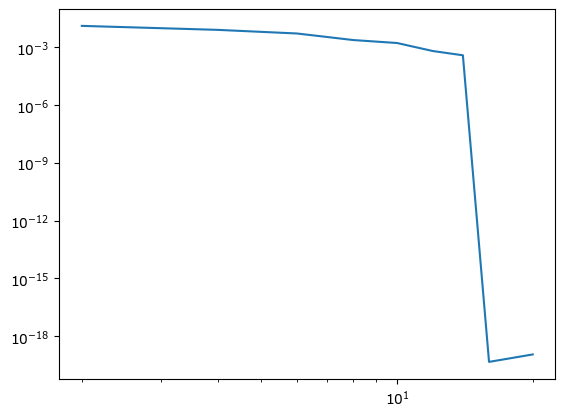

In [68]:
plt.loglog(mxs, norms)


In [69]:
for mx in mxs:
    x_coarse, values_out, x_fine = calc_vm(mx, 1000)
    print('mx:', mx)
    %timeit _ = interpolate(f_peri(x_coarse), values_out)

mx: 2
24.9 ms ± 3.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
mx: 4
80.3 ms ± 3.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
mx: 6
179 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
mx: 8
313 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
mx: 10
480 ms ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
mx: 12
668 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
mx: 14
929 ms ± 43.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
mx: 16
1.18 s ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
mx: 18
1.49 s ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
mx: 20
1.84 s ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
for mx 

%%timeit

pp = interpolate(v_m, values_)

11.6 s ± 1.29 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
mx = 100
nx_fine = 500

In [46]:
%%timeit

pp = interpolate(v_m, values_)

1min 3s ± 529 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


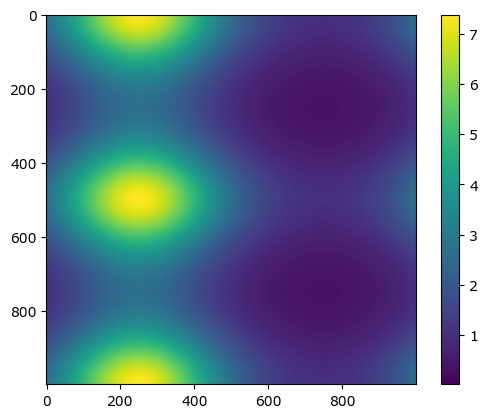

In [42]:
plt.imshow(pp)
plt.colorbar()

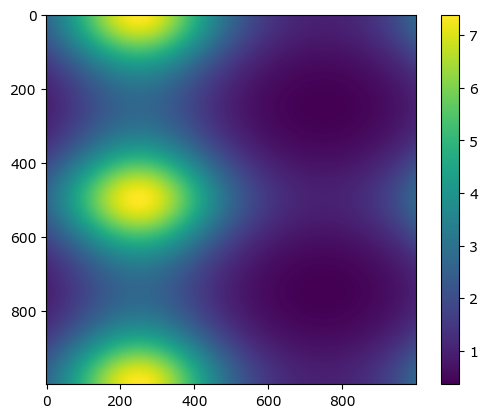

In [37]:
plt.imshow(v_fine)
plt.colorbar()